In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics
import os

In [3]:
city_data_to_load = "PyBer_Analysis/city_data.csv"
ride_data_to_load = "PyBer_Analysis/ride_data.csv"


In [4]:
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [6]:
city_data_df.count()


city            120
driver_count    120
type            120
dtype: int64

In [7]:
# REWIND
    # To get the name of each column and the number of rows that are not null, we can use the df.count() method.
    # Another option is to use df.isnull().sum() method chaining.
    
# Get the columns and the rows that are not null.

city_data_df.count()
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
# REWIND
    #To get the data types of each column, we use the dtypes on the DataFrame.
    
# Get the data types of each column, use the "dtypes" function

city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
# REWIND
    # We can use the unique() method on a specific column, 
    # which will return an array, or list, of all the unique values of that column
    
# Get the unique values of the type of city.

city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
# Get the number of data points from the Urban cities.

sum(city_data_df['type']=='Urban')

66

In [11]:
sum(city_data_df['type']=='Suburban')

36

In [12]:
sum(city_data_df['type']=='Rural')

18

In [13]:
# Get the columns and the rows that are not null.

ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [14]:
# Get the columns and the rows that are not null.

ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [15]:
# Get the data types of each column.

ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [16]:
# Merging DataFrames

# REWIND
    # When we merge two DataFrames, we merge on a column with the same data, 
    # and the same column name, in both DataFrames. We use the following syntax to do that:
        # new_df = pd.merge(leftdf, rightdf, on=["column_leftdf", "column_rightdf"])

    # We may have to merge the DataFrames using the how = parameter either left, right, inner, or outer depending 
    # how we want to merge the DataFrames. The default is inner.
    
# Combine the data into a single dataset

pyber_data_df = pd.merge(ride_data_df, city_data_df, how='left', on=['city', 'city'])

# Display the DataFrame

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [17]:
# Create The Urban, Rural, & Suburban DataFrame

urban_cities_df = pyber_data_df[pyber_data_df['type']=='Urban']
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [18]:
rural_cities_df = pyber_data_df[pyber_data_df['type']=='Rural']
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [19]:
suburban_cities_df = pyber_data_df[pyber_data_df['type']=='Suburban']
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [20]:
# REWIND
  # To create a Data Series with one of the columns in a DataFrame, we can use the groupby() function and add the 
  # column inside the parentheses.

  # Using the groupby() function can be used to group large amounts of data when we want to 
  # compute mathematical operations on these groups.

# Get the number of rides for urban, rural & suburban cities.

urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
urban_ride_count.head()                                                            


city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [21]:
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [22]:
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [23]:
# Get average fare for each city in the urban, rural, & suburban cities.

urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
urban_avg_fare.head()


city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [24]:
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [25]:
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [26]:
# Get the average number of drivers for each urban, rural, & suburban city.
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
urban_driver_count.head()


city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [27]:
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

In [28]:
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

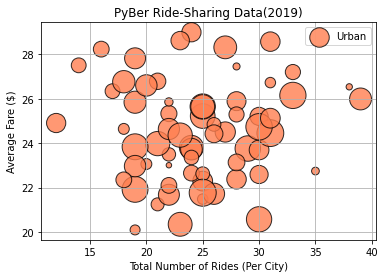

In [29]:
# Rewind
# To create a scatter plot using the MATLAB method, use the plt.scatter() function.
        # x_axis = urban_ride_count & y_axise = urban_avg_fare. 
        # We will be using this code to also show rural & suburban
        
# Build the scatter plots for urban cities.

plt.scatter(urban_ride_count, 
            urban_avg_fare,
           s=10*urban_driver_count, c='coral',
           edgecolor='black', linewidths=1,
           alpha=0.8, label='Urban')

plt.title('PyBer Ride-Sharing Data(2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)

# Add a legend

plt.legend()



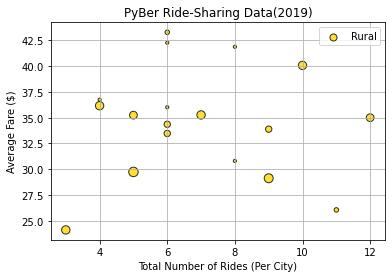

In [30]:
plt.scatter(rural_ride_count,
           rural_avg_fare,
           s=10*rural_driver_count, c='gold',
           edgecolor='black', linewidth=1,
           alpha=0.8, label='Rural')

plt.title('PyBer Ride-Sharing Data(2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)

# Add the legend

plt.legend()

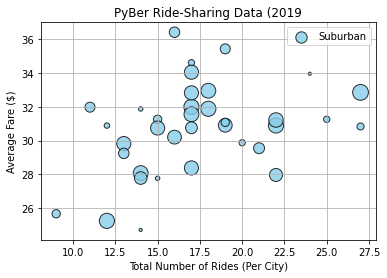

In [31]:
plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s=10*suburban_driver_count, c='skyblue',
           edgecolor='black', linewidth=1,
           alpha=0.8, label="Suburban")

plt.title('PyBer Ride-Sharing Data (2019')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)

# Add the legend

plt.legend()

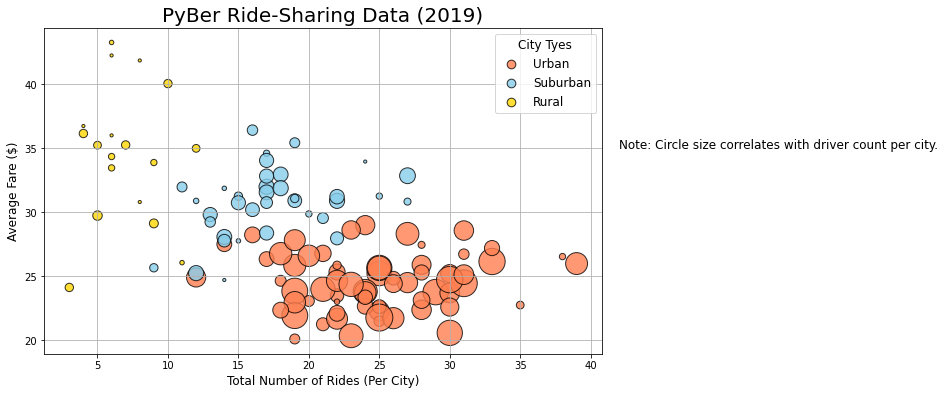

<Figure size 432x288 with 0 Axes>

In [37]:
# To create a bubble chart that showcases all the different city types in one chart, 
# we'll combine our three scatter plot code blocks in one Jupyter Notebook cell.

# Add the three plt.scatter() functions

# Add the scatter charts for each type of city.

plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count, 
            urban_avg_fare,
           s=10*urban_driver_count, c='coral',
           edgecolor='black', linewidths=1,
           alpha=0.8, label='Urban')

plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s=10*suburban_driver_count, c='skyblue',
           edgecolor='black', linewidth=1,
           alpha=0.8, label="Suburban")


plt.scatter(rural_ride_count,
           rural_avg_fare,
           s=10*rural_driver_count, c='gold',
           edgecolor='black', linewidth=1,
           alpha=0.8, label='Rural')

# Incorporate the other graph properties

plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add and update the Legend 

lgnd = plt.legend(fontsize='12', mode='Expanded',
        scatterpoints=1, loc='best', title="City Tyes")

lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, 'Note: Circle size correlates with driver count per city.', fontsize='12')



# Show the plot

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('Analysis/RideSharingData.png', dpi=100)

# Save the figure

 # plt.savefig('Analysis/RideSharingData.png')